## Import Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')

## Data Preparation 

In [23]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1], [0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])

#Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01, cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


# Plotting Data

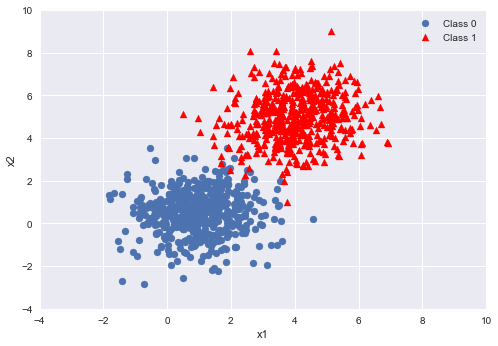

In [32]:
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-4,10)
plt.ylim(-4,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

## Spliting Data in Training & Training Data set

In [35]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [36]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [37]:
np.random.shuffle(data)
print(data[:10])

[[ 2.45227081  0.35550858  0.        ]
 [ 3.6005217   5.66946436  1.        ]
 [ 4.00041748  4.20871933  1.        ]
 [ 2.20133145  1.23467905  0.        ]
 [ 0.02871749 -1.02015794  0.        ]
 [ 4.52075634  5.13764412  1.        ]
 [ 2.71945647  5.31848739  1.        ]
 [ 0.84354799 -0.05574035  0.        ]
 [ 0.50601952  1.5809727   0.        ]
 [ 2.11732251  5.63591161  1.        ]]


In [42]:
split = int(0.8*data.shape[0])

In [43]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]
Y_train = data[:split,-1]
Y_test = data[split:,-1]

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


# Logistic Regression

# Logistic Regression

In [82]:
def hypothesis(x,w,b):
    hx = np.dot(x,w)+b
    return sigmoid(hx)

In [83]:
def sigmoid(hx):
    return 1.0/(1.0 + np.exp(-1.0*hx))

In [84]:
def error(x,y,w,b):
    
    err = 0.0
    for i in range(x.shape[0]):
        hx = hypothesis(x[i],w,b)
        err += y[i] * np.log2(hx) + (1 - y[i])*np.log2(1-hx)
        
    return err/x.shape[0]

In [85]:
# Gradient Descent Function & Update Rule
def get_grad(x,y,w,b):
    
    grad_b = 0.0
    grad_w = np.zeros(w.shape)
    for i in range(x.shape[0]):
        hx = hypothesis(x[i],w,b)
        grad_b += (y[i]-hx)
        grad_w += (y[i]-hx) * x[i]
        
    return [grad_w/x.shape[0], grad_b/x.shape[0]]

In [86]:
def gradient_ascent(x,y,w,b, learning_rate=0.01):
    err = error(x,y,w,b)
    [grad_w, grad_b] = get_grad(x,y,w,b)
    w += learning_rate*grad_w
    b += learning_rate*grad_b
    return err, w, b

In [87]:
'''def predict(x,w,b):
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1'''

'def predict(x,w,b):\n    confidence = hypothesis(x,w,b)\n    if confidence<0.5:\n        return 0\n    else:\n        return 1'

In [98]:
W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [99]:
loss= []

In [103]:
for i in range(1000):
    l, W,b = gradient_ascent(X_train, Y_train, W, b, learning_rate=0.1)
    loss.append(l)

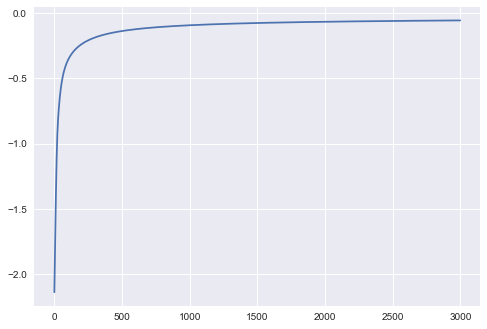

In [104]:
#plt.plot(loss)
#plt.show()
plt.plot(loss)
#plt.ylabel(\"Negative of Log Likelihood\")
#plt.xlabel(\"Time\")
plt.show()

In [105]:
print(w,b)

[0.98322586 1.81091783] -6.909385641103962


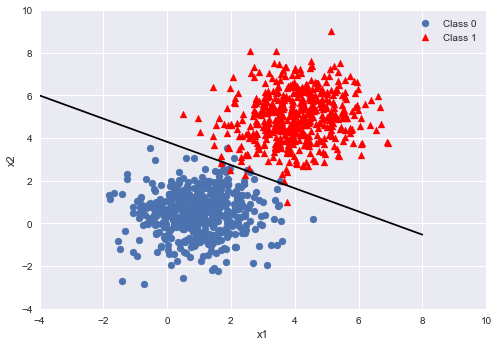

In [106]:
plt.figure(0)
plt.scatter(dist_01[:,0], dist_01[:,1], label='Class 0')
plt.scatter(dist_02[:,0], dist_02[:,1], color='r',marker='^',label='Class 1')
plt.xlim(-4,10)
plt.ylim(-4,10)
plt.xlabel('x1')
plt.ylabel('x2')

x=np.linspace(-4,8,10)
y = -(w[0]*x + b)/w[1]
plt.plot(x,y,color = 'black')
plt.legend()
plt.show()